In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import Callback
import os

2024-04-27 12:14:08.350617: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 12:14:08.566065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 12:14:08.566151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 12:14:08.598551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-27 12:14:08.668625: I tensorflow/core/platform/cpu_feature_guar

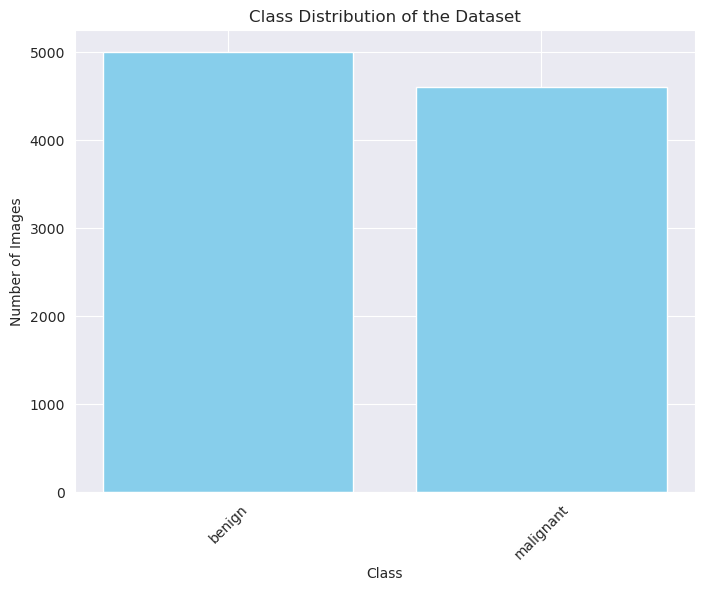

In [2]:
train_ds = '/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/Current_5/melanoma_cancer_dataset/train'
test_ds = train_dir = '/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/Current_5/melanoma_cancer_dataset/test'

# Get the class labels (subdirectories) in the training directory
classes = os.listdir(train_ds)

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(train_ds, cls))) for cls in classes]

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of the Dataset')
plt.xticks(rotation=45)
plt.show()

In [3]:
# Create ImageDataGenerator for train and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # Image augmentation specific to the minority class (malignant)
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'  # Fill mode for points outside the boundaries
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Load and preprocess training images
train_generator = train_datagen.flow_from_directory(
    train_ds,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess test images
test_generator = test_datagen.flow_from_directory(
    test_ds,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Add callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='loss'),
    tf.keras.callbacks.ModelCheckpoint('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_2_checkpoint.keras', save_best_only=True, monitor='loss')
]

In [5]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

model.summary()

/home/craib/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-27 12:14:28.971532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:17:00.0, compute capability: 7.5
2024-04-27 12:14:28.972173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6287 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:65:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,809 (1.24 MB)

 Trainable params: 323,809 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# train model and add callbacks
history = model.fit(train_generator, epochs=60)

Epoch 1/60


/home/craib/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-27 12:14:33.115478: I external/local_xla/xla/service/service.cc:168] XLA service 0x3a054b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-27 12:14:33.115508: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-04-27 12:14:33.115514: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-04-27 12:14:33.248285: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR

  3/301 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.5486 - loss: 0.6898

I0000 00:00:1714202079.901022    4655 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714202079.912680    4655 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


301/301 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.7026 - loss: 0.5523
Epoch 2/60


W0000 00:00:1714202108.086174    4654 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8315 - loss: 0.3849
Epoch 3/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.8469 - loss: 0.3645
Epoch 4/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8578 - loss: 0.3439
Epoch 5/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8672 - loss: 0.3128
Epoch 6/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8693 - loss: 0.3152
Epoch 7/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8730 - loss: 0.2985
Epoch 8/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8711 - loss: 0.3037
Epoch 9/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8746 - loss: 0.2976
Epoch 10/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8828 - loss: 0.2852
Epoch 11/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8776 - loss: 0.2878
Epoch 12/60
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8803 - loss: 0.2863
Epoch 13/60
301/301 ━━━━━━━━━━━━━━━━━━━━

In [7]:
def plot_learning_curves(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    # plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    # plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

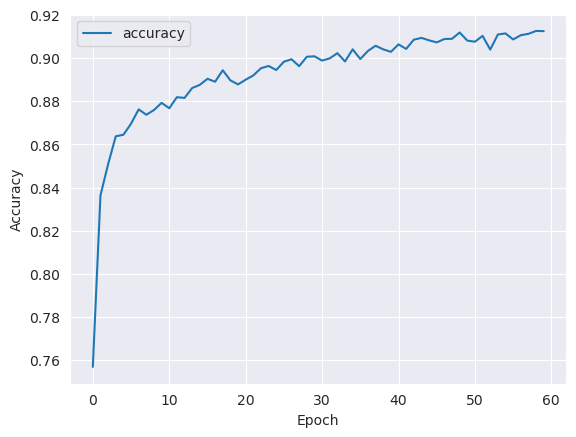

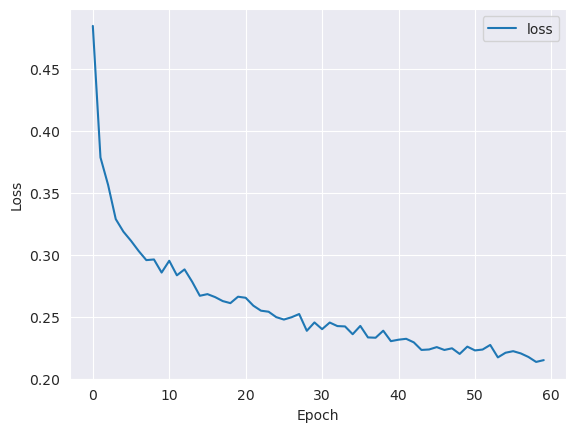

In [8]:
plot_learning_curves(history)

In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8992 - loss: 0.2113

W0000 00:00:1714203643.281627    4651 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9237 - loss: 0.1974
Test Accuracy: 91.20%


W0000 00:00:1714203645.007508    4651 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [10]:
y_pred = model.predict(test_generator)

# Convert the predictions to binary values
y_pred_bin = [int(round(p[0])) for p in y_pred]

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [11]:
# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       500
           1       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



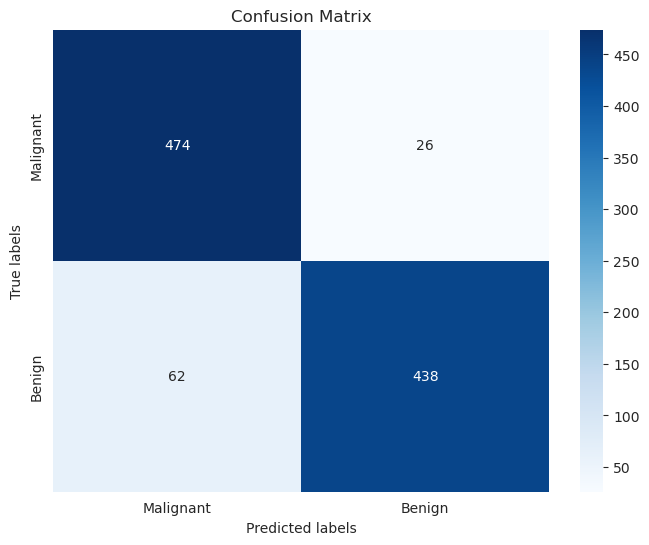

In [12]:
# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
model.save('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_5.keras')

# Evaluating Models (1-4)

 5/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8964 - loss: 0.2056

W0000 00:00:1713954637.064287    7986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9191 - loss: 0.2002


W0000 00:00:1713954638.526143    7983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy (k-model-mel_1): 91.10%
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       500
           1       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



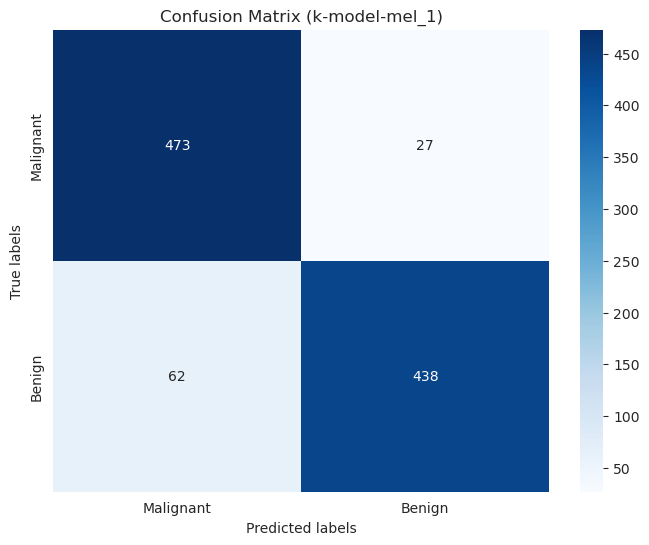

In [70]:
# Load k-model-mel_1
model_1 = tf.keras.models.load_model('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_1.keras')

# Evaluate the model on test data
test_loss_1, test_acc_1 = model_1.evaluate(test_generator)
print(f'Test Accuracy (k-model-mel_1): {test_acc_1 * 100:.2f}%')

# Make predictions
y_pred_1 = model_1.predict(test_generator)
y_pred_bin_1 = [int(round(p[0])) for p in y_pred_1]

# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin_1))

# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (k-model-mel_1)')
plt.show()


 6/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8938 - loss: 0.1854

W0000 00:00:1713954641.481302    7981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9222 - loss: 0.1781


W0000 00:00:1713954643.043384    7983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy (k-model-mel_2): 91.30%
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       500
           1       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



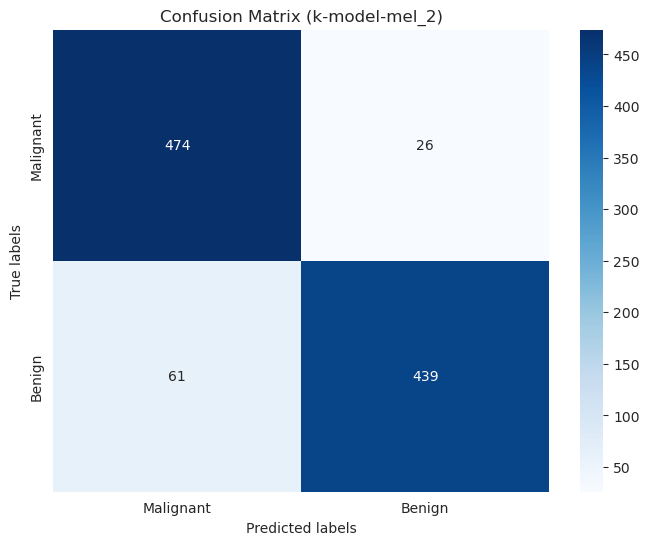

In [71]:
# Load k-model-mel_2
model_2 = tf.keras.models.load_model('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_2.keras')

# Evaluate the model on test data
test_loss_2, test_acc_2 = model_2.evaluate(test_generator)
print(f'Test Accuracy (k-model-mel_2): {test_acc_2 * 100:.2f}%')

# Make predictions
y_pred_2 = model_2.predict(test_generator)
y_pred_bin_2 = [int(round(p[0])) for p in y_pred_2]

# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin_2))

# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (k-model-mel_2)')
plt.show()

 4/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8848 - loss: 0.2823

W0000 00:00:1713954645.971756    7981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9047 - loss: 0.2305


W0000 00:00:1713954647.484236    7986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy (k-model-mel_3): 90.60%
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       500
           1       0.92      0.89      0.90       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



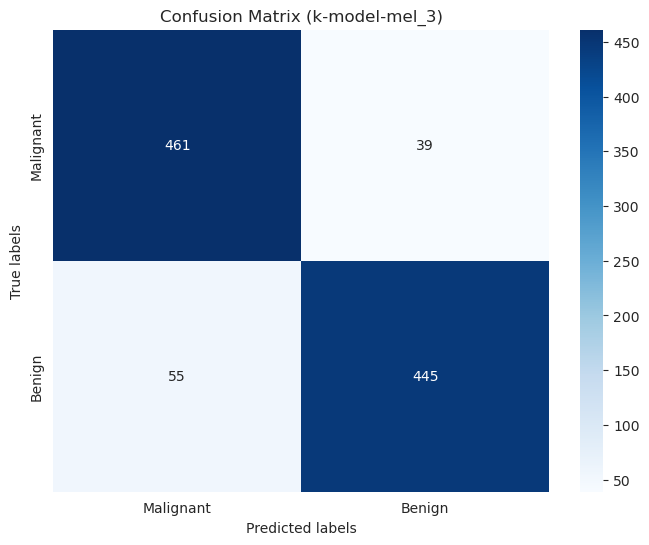

In [72]:
# Load k-model-mel_3
model_3 = tf.keras.models.load_model('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_3.keras')

# Evaluate the model on test data
test_loss_3, test_acc_3 = model_3.evaluate(test_generator)
print(f'Test Accuracy (k-model-mel_3): {test_acc_3 * 100:.2f}%')

# Make predictions
y_pred_3 = model_3.predict(test_generator)
y_pred_bin_3 = [int(round(p[0])) for p in y_pred_3]

# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin_3))

# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (k-model-mel_3)')
plt.show()

 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9000 - loss: 0.2111

W0000 00:00:1713954650.241411    7983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9166 - loss: 0.2108
Test Accuracy (k-model-mel_4): 91.00%


W0000 00:00:1713954651.824232    7981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       500
           1       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



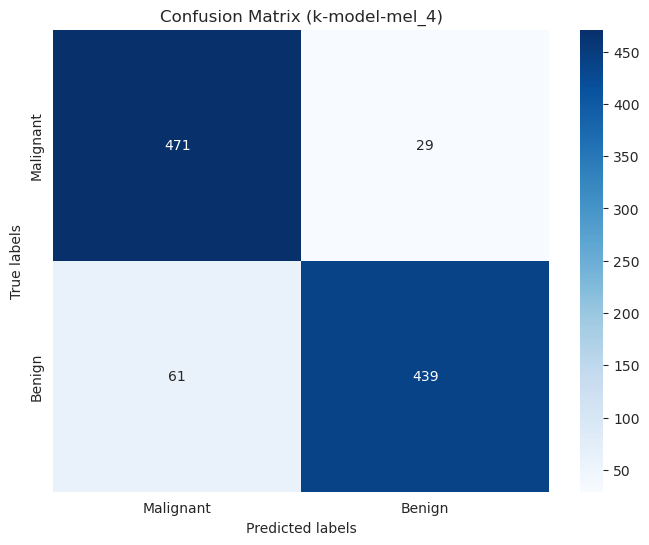

In [73]:
# Load k-model-mel_4
model_4 = tf.keras.models.load_model('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_4.keras')

# Evaluate the model on test data
test_loss_4, test_acc_4 = model_4.evaluate(test_generator)
print(f'Test Accuracy (k-model-mel_4): {test_acc_4 * 100:.2f}%')

# Make predictions
y_pred_4 = model_4.predict(test_generator)
y_pred_bin_4 = [int(round(p[0])) for p in y_pred_4]

# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin_4))

# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin_4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (k-model-mel_4)')
plt.show()

 4/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9147 - loss: 0.2045

W0000 00:00:1713954654.512322    7980 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9268 - loss: 0.1921


W0000 00:00:1713954656.054171    7981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy (k-model-mel_5): 91.50%
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       500
           1       0.95      0.88      0.91       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.91      1000
weighted avg       0.92      0.92      0.91      1000



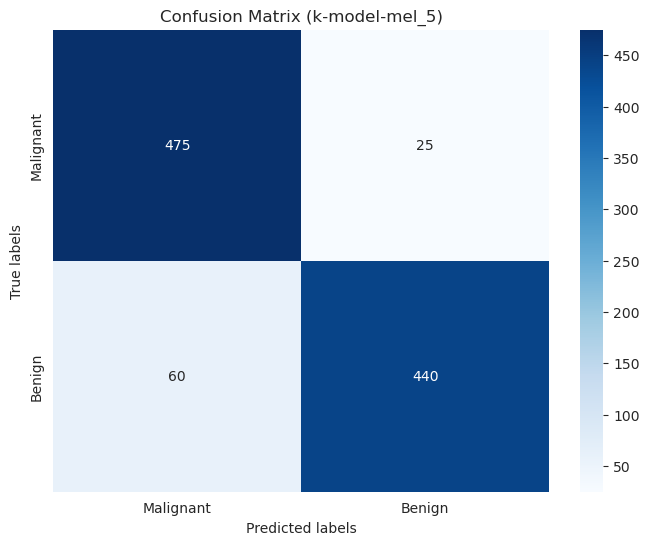

In [74]:
# Load k-model-mel_5
model_5 = tf.keras.models.load_model('/home/craib/Desktop/SCDS_Datasets/Skin Cancer Datasets/5/Saved_Models/k-model-mel_5.keras')

# Evaluate the model on test data
test_loss_5, test_acc_5 = model_5.evaluate(test_generator)
print(f'Test Accuracy (k-model-mel_5): {test_acc_5 * 100:.2f}%')

# Make predictions
y_pred_5 = model_5.predict(test_generator)
y_pred_bin_5 = [int(round(p[0])) for p in y_pred_5]

# Additional metrics: precision, recall, f1-score
print(classification_report(test_generator.classes, y_pred_bin_5))

# Plot confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_bin_5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (k-model-mel_5)')
plt.show()